# Introdução

**Resumo:**

O exemplo aqui desenvolvido tem como objetivo apresentar conceitos iniciais de implementação de redes neurais com python e tensorflow/keras. Esse modelo apresenta um modelo MLP básico que pode ser expandido mudando o número de neurônios e camadas. Em adaptações mais avançadas, pode-se estudar possibilidade de otimização de hyperparâmetros e outras técnincas como aumento de dados.

---

**Para saber mais:**
* François Chollet. Deep Learning with Python. Manning Publications, 2017.
* Ian Goodfellow and Yoshua Bengio and Aaron Courville. [Deep Learning](https://www.deeplearningbook.org/). MIT Press, 2016.

# Bibliotecas e Dados

In [3]:
# Bibliotecas necessárias
# Manipulação de dados
import pandas as pd
# Redes Neurais
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
# Plot
import matplotlib.pyplot as plt
%matplotlib inline
# Avaliação
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
# Lendo o dataset Kaggle
train = pd.read_csv("../input/digit-recognizer/train.csv")

#Alternativa ler do próprio keras
#(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [5]:
# Analisando o dataset
print("Quantidade de elementos de treino: {}". format(len(train)))
print(train.head())

Quantidade de elementos de treino: 42000
   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  

In [6]:
train.iloc[14]

label       3
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Name: 14, Length: 785, dtype: int64

In [7]:
train["label"]

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [8]:
# Separando x_train e y_train
Y = train["label"]
X = train.drop(labels = ["label"],axis = 1)
print(X.head())
# Em formato numpy array de imagens 28 x 28
#x = X.values.reshape(-1,28,28,1)
#print(x[0])

   pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0   

In [9]:
print(Y)

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64


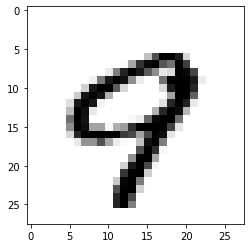

Label: 9


In [10]:
# Numtendi nada!
# Bora ver com matplotlib
plt.imshow(X.values[100].reshape(28,28), cmap=plt.cm.binary)
plt.show()
print('Label: {}'.format(Y[100]))

In [11]:
# Transformando a imagem 2d em um numpy array (imagem 28*28 = 784 pixels)
x = X.values.reshape(42000, 784)  #42000 o número de exemplos,784 o número de pixels naquela tabela pixel0

#Normalizando para valores entre 0 e 1
x = x.astype('float32')
x /= 255

print(x[100])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [12]:
# Vamos ajustar o formato da saida
# Ativação de neuronios na saída
num_classes = 10

# Convertendo para um vetor de saida com 10 dimensoes
# ex. 8 => [0,0,0,0,0,0,0,0,1,0]
y = keras.utils.to_categorical(Y, num_classes)
print(y[100])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [13]:
# Separando uma parte para treino (90%) e outra para validação (10%)
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.1, random_state=9)
print('Qtde de treino: {}'.format(len(x_train)))
print('Qtde de validação: {}'.format(len(x_val)))

Qtde de treino: 37800
Qtde de validação: 4200


# Criando e treinando o Modelo

In [26]:
# Criando o modelo Sequential
# Sequential: Modelo Keras de ir adicionando camadas (como um lego)
# Dense: Camada onde todas as entradas estão conectadas em cada neurônio (totalmente conectada)
# Dropout: Camada usa durante treino que descarta aleatoriamente um percentual de conexões (reduz overfitting)

model = Sequential()
# Camada com 20 neurônios
model.add(Dense(60, activation='relu', input_shape=(784,)))
# Dropout de 15%
model.add(Dropout(0.15))
# Camada de 10 neurônios
model.add(Dense(10, activation='relu'))
# Dropout de 15%
model.add(Dropout(0.15))
# Camda de classificação final, com 1 neurônio para cada classe de saída. Softmax divide a probabilidade de cada classe.
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 60)                47100     
_________________________________________________________________
dropout_4 (Dropout)          (None, 60)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                610       
_________________________________________________________________
dropout_5 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                110       
Total params: 47,820
Trainable params: 47,820
Non-trainable params: 0
_________________________________________________________________


In [28]:
# Compila o modelo
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(0.001),
              metrics=['accuracy'])

In [29]:
# Treina com os parte dos dados
batch_size = 32
epochs = 30
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_val, y_val))

Train on 37800 samples, validate on 4200 samples
Epoch 1/30
37800/37800 [==============================] - 2s 59us/sample - loss: 0.7620 - accuracy: 0.7404 - val_loss: 0.2720 - val_accuracy: 0.9264
Epoch 2/30
37800/37800 [==============================] - 2s 51us/sample - loss: 0.4151 - accuracy: 0.8685 - val_loss: 0.1940 - val_accuracy: 0.9448
Epoch 3/30
37800/37800 [==============================] - 2s 49us/sample - loss: 0.3324 - accuracy: 0.8972 - val_loss: 0.1660 - val_accuracy: 0.9540
Epoch 4/30
37800/37800 [==============================] - 2s 48us/sample - loss: 0.2839 - accuracy: 0.9117 - val_loss: 0.1471 - val_accuracy: 0.9586
Epoch 5/30
37800/37800 [==============================] - 2s 48us/sample - loss: 0.2565 - accuracy: 0.9214 - val_loss: 0.1332 - val_accuracy: 0.9643
Epoch 6/30
37800/37800 [==============================] - 2s 49us/sample - loss: 0.2347 - accuracy: 0.9290 - val_loss: 0.1358 - val_accuracy: 0.9636
Epoch 7/30
37800/37800 [==============================] -

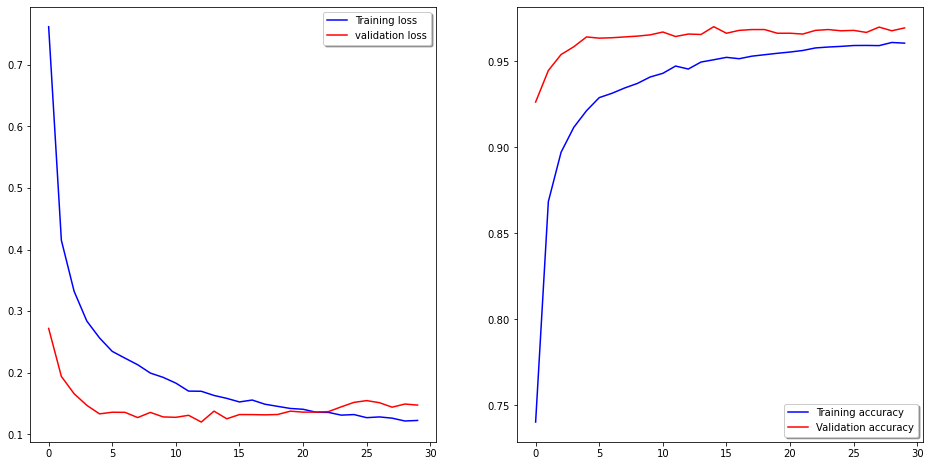

In [31]:
#Vamos ver como foi o treino?

fig, ax = plt.subplots(1,2, figsize=(16,8))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

**Obs:** Quando a linha vermelha (curva de validação) está acima, no primeiro gráfico (perda), e abaixo, no segundo gráfico (acurácia), da linha azul. Isso provavelmente indica *overfitting*

In [32]:
# Testa
score = model.evaluate(x_val, y_val, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.14741904922140142
Test accuracy: 0.9695238


In [34]:
Y[20]

8

In [35]:
# Testando uma entrada qualquer
print(y_train[20])
print(model.predict(x_train[20].reshape((1,784))))
print(model.predict_classes(x_train[20].reshape((1,784))))

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[[3.6554318e-13 1.7340133e-14 4.2200449e-12 4.9472519e-13 1.4958575e-13
  2.2090441e-09 1.0000000e+00 4.1928237e-19 3.2583880e-11 2.0508704e-25]]
[6]


# Avaliando o Modelo

In [36]:
import itertools
#Plot the confusion matrix. Set Normalize = True/False
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       396
           1       0.99      1.00      0.99       488
           2       0.96      0.97      0.97       395
           3       0.97      0.96      0.97       445
           4       0.95      0.98      0.97       441
           5       0.96      0.97      0.96       384
           6       0.98      0.96      0.97       398
           7       0.97      0.95      0.96       428
           8       0.96      0.97      0.96       416
           9       0.97      0.95      0.96       409

    accuracy                           0.97      4200
   macro avg       0.97      0.97      0.97      4200
weighted avg       0.97      0.97      0.97      4200



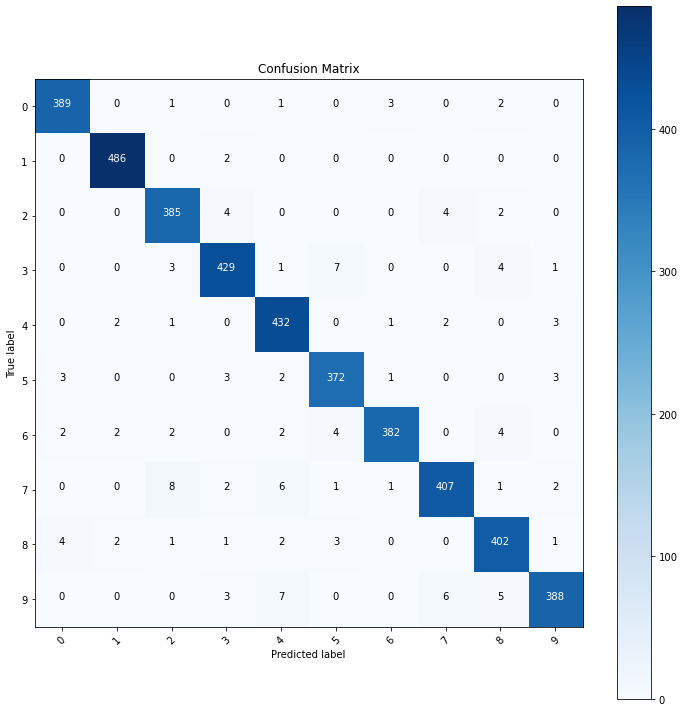

In [37]:
# Vendo alguns reports
# Usando sklearn
import numpy as np

# Classificando toda base de teste
y_pred = model.predict_classes(x_val)
# voltando pro formato de classes
y_test_c = np.argmax(y_val, axis=1)
target_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

#Confution Matrix
cm = confusion_matrix(y_test_c, y_pred)
plot_confusion_matrix(cm, target_names, normalize=False, title='Confusion Matrix')

print('Classification Report')
print(classification_report(y_test_c, y_pred, target_names=target_names))

# Gerando Saída

Qtde de testes: 28000


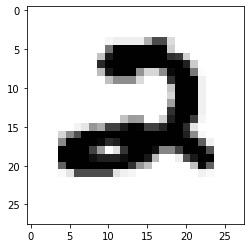

Previsto: 2
   ImageId  Label
0        1      2
1        2      0
2        3      9
3        4      9
4        5      3
5        6      7
6        7      0
7        8      3
8        9      0
9       10      3


In [38]:
# Gerando saída para dataset de teste

#Carrega dataset de teste
test = pd.read_csv("../input/digit-recognizer/test.csv")
print("Qtde de testes: {}".format(len(test)))
# Bota no formato numpy e normaliza
x_test = test.values.reshape(len(test),784)
x_test = x_test.astype('float32')
x_test /= 255

# Faz classificação para dataset de teste
y_pred = model.predict_classes(x_test)

# Verficando algum exemplo
i = 0
plt.imshow(test.values[i].reshape(28,28), cmap=plt.cm.binary)
plt.show()
print('Previsto: {}'.format(y_pred[i]))

# Botando no formato de saída (competição Kaggle)
results = pd.Series(y_pred,name="Label")
submission = pd.concat([pd.Series(range(1,len(y_pred)+1),name = "ImageId"),results],axis = 1)
print(submission.head(10))
#Salvando Arquivo
submission.to_csv("mlp_mnist_v1.csv",index=False)

# Teste Adicional: Com ruído

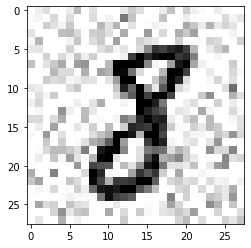

Test loss: 2.231214622770037
Test accuracy: 0.62857145


In [39]:
#introduzindo ruido
import numpy as np
mean = 0.
stddev = 0.2
noise = np.random.normal(mean, stddev, (4200, 784))
x_te = x_val + noise
x_te = np.clip(x_te, 0., 1.)

plt.imshow(x_te.reshape(4200, 28,28)[0], cmap=plt.cm.binary)
plt.show()

# Testa
score = model.evaluate(x_te, y_val, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Com ruído, percebemos que a acurácia dos exemplos de validação caiu muito. 
Uma MLP aprende a partir de pixels individuais.
Um modelo Convolucional (CNN) captura melhor regiões, ou padrões espaciais de pixels.
Veja o exemplo com CNN.